# **Project 3: Hamburger/Hotdog**


## **Import the necessary libraries**

In [1]:
from PIL import Image
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


# scikit-learn modules
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Library for randomly selecting data points
import random

from Utils import plot_training_history, evaluate_model, plot_confusion_matrix, calculate_additional_metrics

## **Load and Prepare the Dataset**

- Load and standardize the dataset
- Extract and encode lables. 
- Split the data into the train and the test dataset.

In [2]:
# Function to Load Images and Labels
# This function walks through the directory structure, loads the images, converts them into a consistent format,
# resizes them as needed and extracts labels from the directory names:

def load_images_from_folder(folder, count, img_size=(256, 256)):
    images = []
    for idx, filename in enumerate(os.listdir(folder)):
        if idx >= count:  # Only load up to 'count' images
            break
        if filename.endswith('.jpg'):  
            img_path = os.path.join(folder, filename)
            with Image.open(img_path) as img:
                img = img.convert('RGB')  # Convert to RGB
                img = img.resize(img_size)  # Resize the image
                images.append(np.array(img))
    return np.array(images)


In [3]:
# Load Images and Create Labels
hotdog_folder = '/Users/jenniferleone/Desktop/AI_Bootcamp/Project 3/Images/HOTDOG'
hamburger_folder = '/Users/jenniferleone/Desktop/AI_Bootcamp/Project 3/Images/HAMBURGER'

# Load images
hotdog_images = load_images_from_folder(hotdog_folder,1000)
hamburger_images = load_images_from_folder(hamburger_folder,1000)

# Create labels (zeros and ones for the hotdog and notdog images)
hotdog_labels = np.ones(len(hotdog_images))
hamburger_labels = np.zeros(len(hamburger_images))

# Combine images and labels
X = np.concatenate((hotdog_images, hamburger_images), axis=0)
y = np.concatenate((hotdog_labels, hamburger_labels), axis=0)


In [4]:
print(len(hamburger_images))
print(len(hotdog_images))  

1000
1000


In [5]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

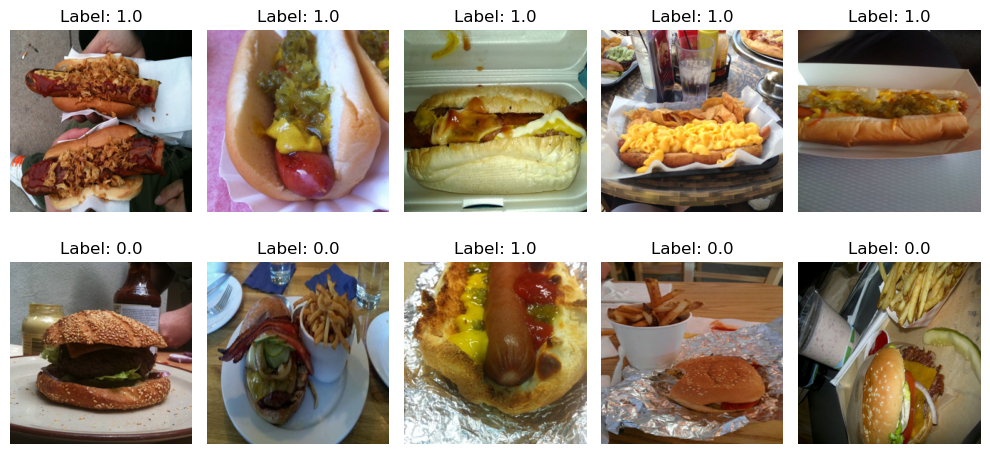

In [6]:
# Visualize the first 10 images in the dataset and printing their classification labels

def plot_images(images, labels, num_images=10):
    # Set up the figure size in inches
    plt.figure(figsize=(10, 5))
    
    for i in range(num_images):
        # Create a subplot for each image
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')  # Turn off axis numbering
        
    plt.tight_layout()
    plt.show()

plot_images(X_train, y_train)


## **Data preparation**
- Normalize the train and the test dataset by dividing by 255.

In [7]:
# Normalizing the image pixel inputs
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
# Displaying the first normalized training image
print('Test Dataset:', X_test.shape, y_test.shape)
print('Training Dataset:', X_train.shape, y_train.shape)

Test Dataset: (400, 256, 256, 3) (400,)
Training Dataset: (1600, 256, 256, 3) (1600,)


In [9]:
# Displaying the first normalized testing image and its pixel values
print("Shape of the first normalized testing image:", X_test[0].shape)
print("Pixel values of the first normalized testing image:")
print(X_test[0])

Shape of the first normalized testing image: (256, 256, 3)
Pixel values of the first normalized testing image:
[[[0.08627451 0.0627451  0.01176471]
  [0.09019608 0.07058824 0.02352941]
  [0.08235294 0.07843137 0.03137255]
  ...
  [0.08627451 0.04705882 0.02745098]
  [0.09411765 0.04705882 0.03921569]
  [0.10588235 0.05098039 0.04313725]]

 [[0.11372549 0.08627451 0.04313725]
  [0.06666667 0.05098039 0.01176471]
  [0.05882353 0.05490196 0.01568627]
  ...
  [0.09019608 0.03529412 0.01960784]
  [0.08627451 0.03137255 0.01568627]
  [0.09019608 0.03529412 0.01960784]]

 [[0.20784314 0.18823529 0.14901961]
  [0.09803922 0.08235294 0.05098039]
  [0.03921569 0.03137255 0.00784314]
  ...
  [0.1372549  0.0627451  0.04313725]
  [0.10196078 0.03529412 0.01176471]
  [0.07058824 0.01960784 0.        ]]

 ...

 [[0.00392157 0.01176471 0.00392157]
  [0.00392157 0.00784314 0.        ]
  [0.01568627 0.02352941 0.01176471]
  ...
  [0.01568627 0.02352941 0.01176471]
  [0.01176471 0.01960784 0.00784314]
  

## **Model Building**

---
### **CNN Model - Iteration #1**

In [10]:
### Fix the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [11]:
# Define a CNN model
model_1 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
batch_size = 32
epochs = 10
history = model_1.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epochs
)

/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 221ms/step - accuracy: 0.5764 - loss: 2.7122 - val_accuracy: 0.6700 - val_loss: 0.6564
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 215ms/step - accuracy: 0.8246 - loss: 0.4261 - val_accuracy: 0.6925 - val_loss: 0.6447
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 221ms/step - accuracy: 0.9333 - loss: 0.1934 - val_accuracy: 0.6825 - val_loss: 0.6861
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 214ms/step - accuracy: 0.9843 - loss: 0.0730 - val_accuracy: 0.6250 - val_loss: 0.9901
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 216ms/step - accuracy: 0.9964 - loss: 0.0499 - val_accuracy: 0.5550 - val_loss: 1.3968
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 221ms/step - accuracy: 0.9733 - loss: 0.1020 - val_accuracy: 0.6300 - val_loss: 0.8714
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 219ms/step - accuracy: 0.9797 - loss: 0.0871 - val_accuracy: 0.6550 - val_loss: 1.0471
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 227ms/step - accuracy: 0.9984 - loss: 0.0236 - val_accu

In [12]:
# Evaluating on the Test dataset
evaluate_model(model_1, X_test, y_test)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6764 - loss: 1.1971
Test Loss: 1.152781367301941
Test Accuracy: 0.6600000262260437


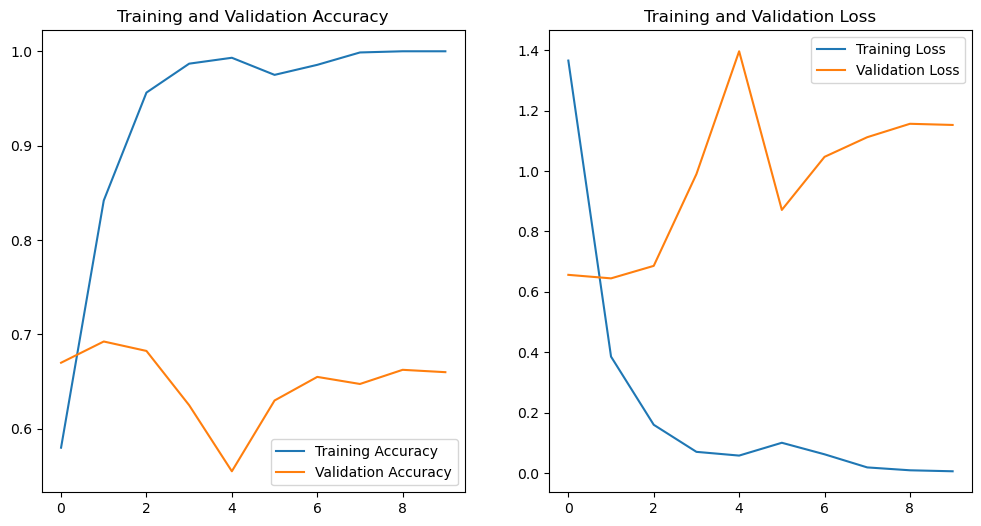

In [13]:
# Accuracy and Loss Plots
plot_training_history(history)

In [15]:
# Make Predictions
y_pred = model_1.predict(X_test)

# Convert probabilities to binary labels based on a 0.5 threshold
y_pred_labels = (y_pred > 0.5).astype(int)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


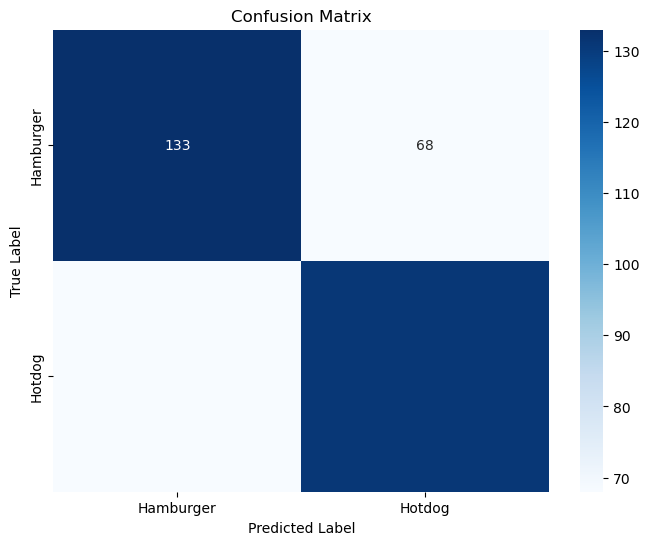

In [16]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred, ['Hamburger', 'Hotdog'])

### **CNN Model - Iteration #2**

### Augmentation

In [17]:
# Apply augmentation to the whole training dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation (degrees)
    width_shift_range=0.1,  # Random horizontal shift
    height_shift_range=0.1, # Random vertical shift
    shear_range=0.2,        # Shear intensity
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flip
    vertical_flip=False,    # No vertical flip for face images
    fill_mode='nearest'     # Fill mode for handling newly created pixels
)

# Create variables to hold the X and y training data
X_train_aug = []
y_train_aug = []

# Loop through all the images.
for i in range(len(X_train)):
    # Select the image
    img = X_train[i]
    # Select the label from the training data
    label = y_train[i]
    
    # Ensure that the input data has the correct shape (Add batch dimension)
    img = np.expand_dims(img, axis=0)

    # Create the iterator
    it = datagen.flow(img, batch_size=1)

    # Add 5 augmented images for every original image
    for j in range(5):
        # Append a new image to the X list
        X_train_aug.append(next(it)[0])  # Correctly use next() with the iterator
        # Append the label for the original image to the y list
        y_train_aug.append(label)

# Print the length of each list
print(len(X_train_aug))
print(len(y_train_aug))


8000
8000


In [18]:
# Convert lists to numpy arrays
X_train_aug = np.array(X_train_aug)
y_train_aug = np.array(y_train_aug)

# Ensure X_train_aug is a 4D array and y_train_aug is a 1D array
print("X_train_aug shape:", X_train_aug.shape)
print("y_train_aug shape:", y_train_aug.shape)


X_train_aug shape: (8000, 256, 256, 3)
y_train_aug shape: (8000,)


In [19]:
### Fix the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [20]:
# Define CNN model_2
model_2 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
batch_size = 32
epochs = 10
history = model_2.fit(
    X_train_aug, y_train_aug,
    validation_data=(X_test, y_test),
    epochs=epochs
)

/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 55s 213ms/step - accuracy: 0.6037 - loss: 1.1343 - val_accuracy: 0.6300 - val_loss: 0.6456
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 51s 201ms/step - accuracy: 0.7474 - loss: 0.5327 - val_accuracy: 0.6450 - val_loss: 0.7328
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 50s 201ms/step - accuracy: 0.8678 - loss: 0.3236 - val_accuracy: 0.6350 - val_loss: 1.0630
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 211ms/step - accuracy: 0.9242 - loss: 0.2081 - val_accuracy: 0.6175 - val_loss: 1.1942
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 52s 206ms/step - accuracy: 0.9654 - loss: 0.1082 - val_accuracy: 0.6300 - val_loss: 1.4143
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 52s 206ms/step - accuracy: 0.9766 - loss: 0.0802 - val_accuracy: 0.6075 - val_loss: 1.8296
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 52s 209ms/step - accuracy: 0.9695 - loss: 0.0947 - val_accuracy: 0.5750 - val_loss: 2.0289
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 50s 202ms/step - accuracy: 0.9801 - loss: 0

In [21]:
# Evaluating on the Test dataset
evaluate_model(model_2, X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6049 - loss: 2.8605
Test Loss: 2.822462558746338
Test Accuracy: 0.6000000238418579


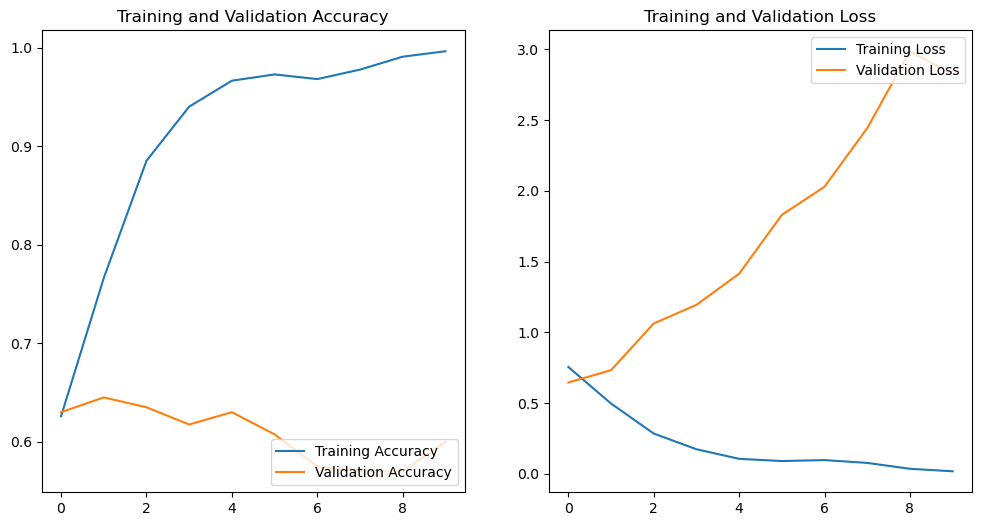

In [22]:
# Accuracy and Loss Plots
plot_training_history(history)

### **CNN Model - Iteration #3**

### Dropout
Dropout is a technique where randomly selected neurons are ignored during training, reducing the chance of overfitting. 

In [23]:
### Fix the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [24]:
from tensorflow.keras.layers import Dropout

# Define CNN model_3 with Dropout

model_3 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Dropout layer after pooling
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),   # Dropout layer after first dense layer
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
# Train the model
batch_size = 32
epochs = 10
history = model_3.fit(
    X_train_aug, y_train_aug,
    validation_data=(X_test, y_test),
    epochs=epochs
)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 230ms/step - accuracy: 0.5648 - loss: 1.1549 - val_accuracy: 0.6725 - val_loss: 0.6316
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 55s 219ms/step - accuracy: 0.6430 - loss: 0.6220 - val_accuracy: 0.6925 - val_loss: 0.6025
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 55s 219ms/step - accuracy: 0.6827 - loss: 0.5716 - val_accuracy: 0.7050 - val_loss: 0.5881
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 211ms/step - accuracy: 0.7262 - loss: 0.5155 - val_accuracy: 0.7150 - val_loss: 0.5678
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 212ms/step - accuracy: 0.7822 - loss: 0.4507 - val_accuracy: 0.6950 - val_loss: 0.6434
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 93s 372ms/step - accuracy: 0.8046 - loss: 0.3984 - val_accuracy: 0.7100 - val_loss: 0.7067
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 54s 215ms/step - accuracy: 0.8404 - loss: 0.3313 - val_accuracy: 0.6750 - val_loss: 0.8380
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 211ms/step - accuracy: 0.8576 - loss: 0

In [26]:
# Evaluating on the Test dataset
evaluate_model(model_3, X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7032 - loss: 0.8968
Test Loss: 0.9431167244911194
Test Accuracy: 0.7024999856948853


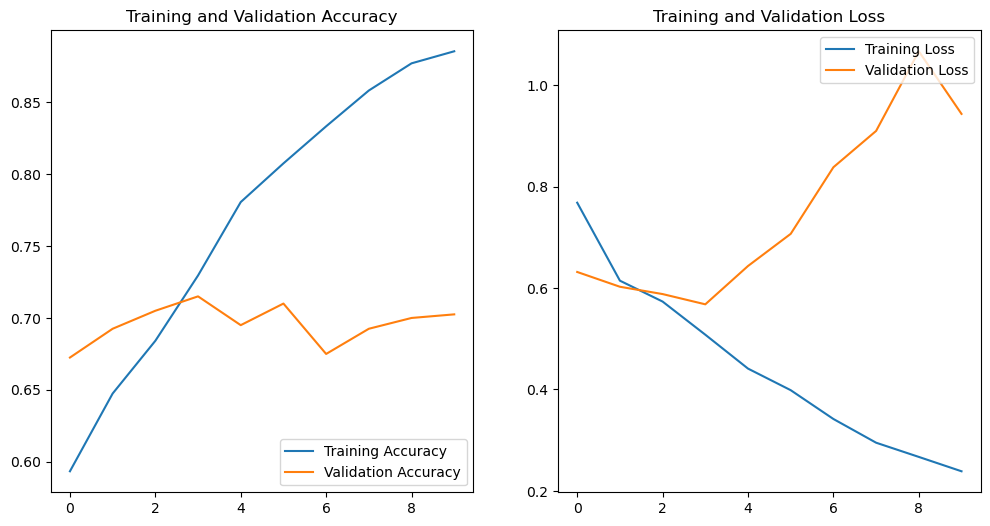

In [27]:
# Accuracy and Loss Plots
plot_training_history(history)


### **CNN Model - Iteration #4**

### Early Stopping & Dropout
Early stopping is a method to stop training when the validation metric stops improving, preventing overfitting and saving computational resources.

In [28]:
### Fix the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [29]:
# Define a CNN model
model_4 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Dropout layer after pooling
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),   # Dropout layer after first dense layer
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [30]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',   # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    verbose=1,            # Verbosity mode
    restore_best_weights=True  # Restores model weights from the epoch with the lowest validation loss
)

# Fit the model with early stopping
history = model_4.fit(
    X_train_aug, y_train_aug,
    validation_data=(X_test, y_test),  
    epochs=10,  
    callbacks=[early_stopping] 
)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 60s 236ms/step - accuracy: 0.5656 - loss: 1.1542 - val_accuracy: 0.6725 - val_loss: 0.6255
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 54s 214ms/step - accuracy: 0.6541 - loss: 0.6200 - val_accuracy: 0.7050 - val_loss: 0.6376
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 213ms/step - accuracy: 0.6802 - loss: 0.5782 - val_accuracy: 0.7050 - val_loss: 0.5807
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 54s 214ms/step - accuracy: 0.7264 - loss: 0.5137 - val_accuracy: 0.6650 - val_loss: 0.6096
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 210ms/step - accuracy: 0.7659 - loss: 0.4677 - val_accuracy: 0.7000 - val_loss: 0.6005
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 54s 216ms/step - accuracy: 0.8032 - loss: 0.3909 - val_accuracy: 0.7050 - val_loss: 0.6243
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.


In [31]:
# Evaluating on the Test dataset
evaluate_model(model_4, X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7119 - loss: 0.5617
Test Loss: 0.5807373523712158
Test Accuracy: 0.7049999833106995


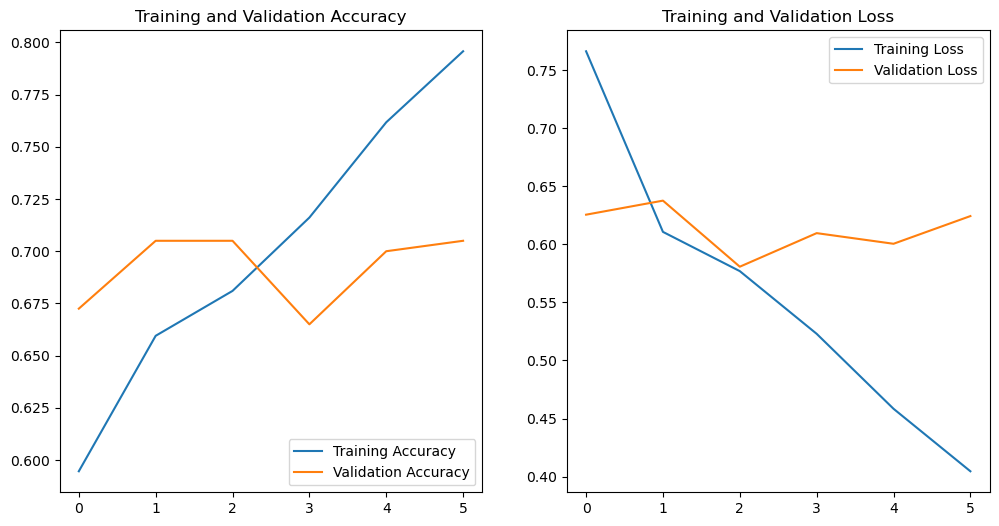

In [32]:
# Accuracy and Loss Plots
plot_training_history(history)